**Ejercicio 1 - Topología de una red neuronal**

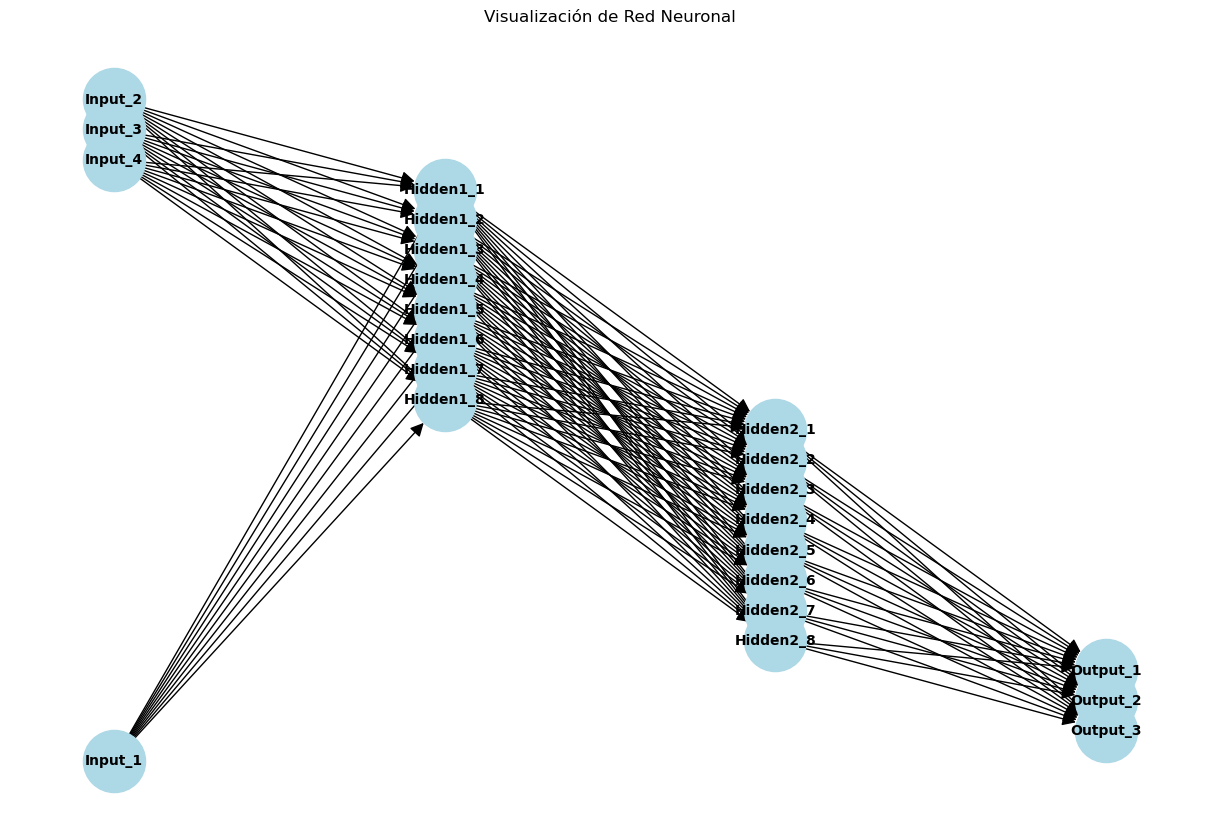

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Definición de la red neuronal
input_neurons = 4
hidden_neurons_1 = 8
hidden_neurons_2 = 8
output_neurons = 3

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos de la capa de entrada
for i in range(input_neurons):
    G.add_node(f'Input_{i+1}', layer='input')

# Añadir nodos de la primera capa oculta
for i in range(hidden_neurons_1):
    G.add_node(f'Hidden1_{i+1}', layer='hidden1')

# Añadir nodos de la segunda capa oculta (opcional)
for i in range(hidden_neurons_2):
    G.add_node(f'Hidden2_{i+1}', layer='hidden2')

# Añadir nodos de la capa de salida
for i in range(output_neurons):
    G.add_node(f'Output_{i+1}', layer='output')

# Añadir aristas entre la capa de entrada y la primera capa oculta
for i in range(input_neurons):
    for j in range(hidden_neurons_1):
        G.add_edge(f'Input_{i+1}', f'Hidden1_{j+1}')

# Añadir aristas entre la primera y la segunda capa oculta
for i in range(hidden_neurons_1):
    for j in range(hidden_neurons_2):
        G.add_edge(f'Hidden1_{i+1}', f'Hidden2_{j+1}')

# Añadir aristas entre la segunda capa oculta y la capa de salida
for i in range(hidden_neurons_2):
    for j in range(output_neurons):
        G.add_edge(f'Hidden2_{i+1}', f'Output_{j+1}')

# Posicionar los nodos en capas
pos = {}
layer_gap = 1
layer_x = {
    'input': 0,
    'hidden1': layer_gap,
    'hidden2': 2 * layer_gap,
    'output': 3 * layer_gap
}

for node, data in G.nodes(data=True):
    layer = data['layer']
    pos[node] = (layer_x[layer], -list(G.nodes).index(node) % (input_neurons + hidden_neurons_1 + hidden_neurons_2 + output_neurons))

# Dibujar el grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Visualización de Red Neuronal')
plt.show()

**Ejercicio 1 -VI - Diagrama de una red convolucional**

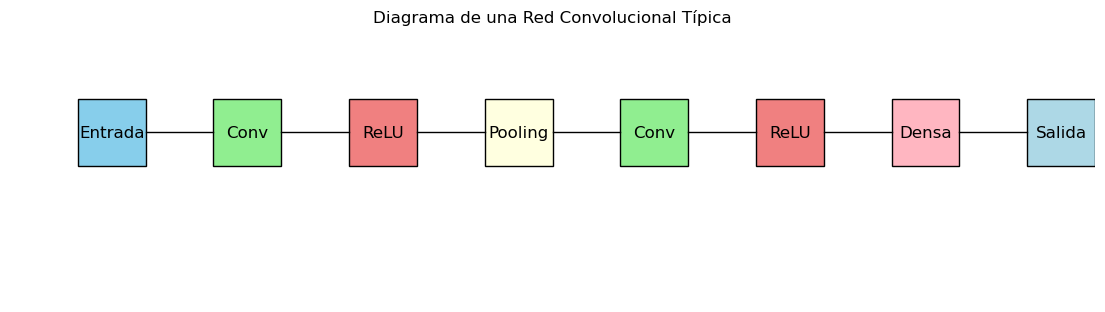

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_cnn():
    fig, ax = plt.subplots(figsize=(14, 6))

    # Parámetros para dibujar las capas
    layer_width = 1
    layer_height = 1
    layer_gap = 2

    # Función para dibujar una capa
    def draw_layer(ax, x, y, width, height, color, label):
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)
        ax.text(x + width/2, y + height/2, label, ha='center', va='center', fontsize=12, color='black')

    # Función para dibujar una conexión entre capas
    def draw_connection(ax, x1, y1, x2, y2):
        ax.plot([x1, x2], [y1, y2], 'k-', linewidth=1)

    # Posiciones iniciales
    x = 0
    y = 0

    # Dibujar las capas de la red convolucional
    layers = ['Entrada', 'Conv', 'ReLU', 'Pooling', 'Conv', 'ReLU',  'Densa', 'Salida']
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightgreen', 'lightcoral', 'lightpink', 'lightblue']
    positions = []

    for i, layer in enumerate(layers):
        draw_layer(ax, x, y, layer_width, layer_height, colors[i], layer)
        positions.append((x + layer_width, y + layer_height / 2))
        x += layer_gap

    # Dibujar las conexiones entre las capas
    for i in range(len(positions) - 1):
        draw_connection(ax, positions[i][0], positions[i][1], positions[i + 1][0] - layer_gap + layer_width, positions[i + 1][1])

    # Configurar el gráfico
    ax.set_xlim(-1, x - layer_gap + 1)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title('Diagrama de una Red Convolucional Típica')
    plt.show()

draw_cnn()

**Ejercicio 1. VII - Diagrama de topología de una LTSM**

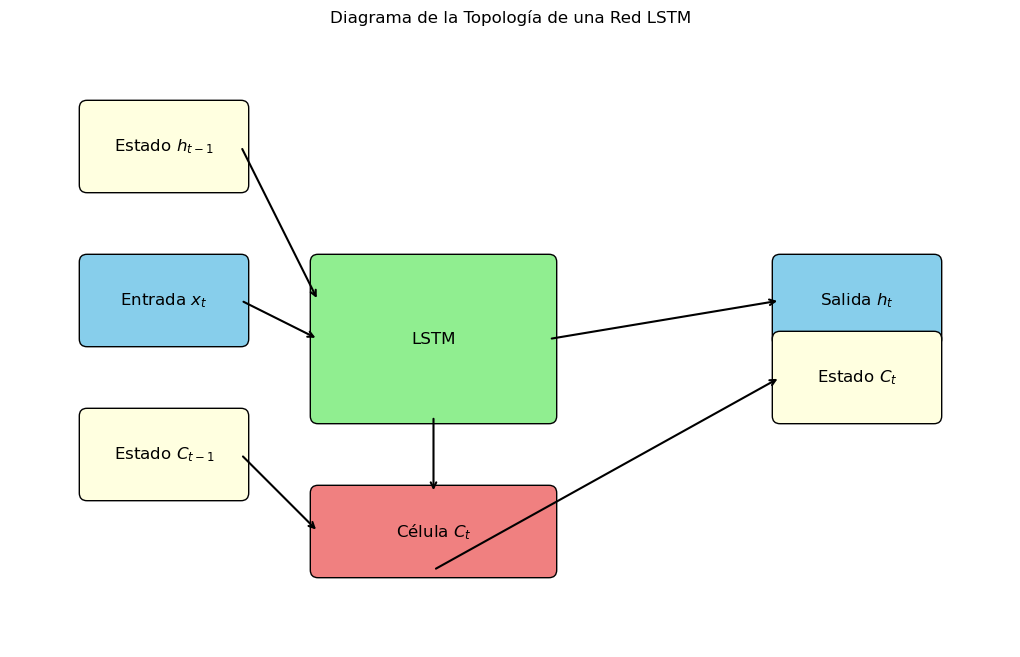

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_lstm_topology():
    fig, ax = plt.subplots(figsize=(14, 8))

    # Función para dibujar una caja con texto
    def draw_box(ax, xy, width, height, label, color):
        box = patches.FancyBboxPatch(xy, width, height, boxstyle="round,pad=0.1", edgecolor='black', facecolor=color)
        ax.add_patch(box)
        ax.text(xy[0] + width / 2, xy[1] + height / 2, label, ha='center', va='center', fontsize=12, color='black')

    # Función para dibujar una flecha
    def draw_arrow(ax, start, end):
        ax.annotate('', xy=end, xytext=start, arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

    # Coordenadas y tamaños de las cajas
    box_width, box_height = 2, 1
    lstm_width, lstm_height = 3, 2
    cell_width, cell_height = 3, 1

    # Posiciones de las cajas
    input_pos = (1, 4)
    lstm_pos = (4, 3)
    cell_pos = (4, 1)
    output_pos = (10, 4)
    state_prev_pos = (1, 6)
    cell_prev_pos = (1, 2)
    state_next_pos = (10, 3)

    # Dibujar las cajas
    draw_box(ax, input_pos, box_width, box_height, 'Entrada $x_t$', 'skyblue')
    draw_box(ax, lstm_pos, lstm_width, lstm_height, 'LSTM', 'lightgreen')
    draw_box(ax, cell_pos, cell_width, cell_height, 'Célula $C_t$', 'lightcoral')
    draw_box(ax, output_pos, box_width, box_height, 'Salida $h_t$', 'skyblue')
    draw_box(ax, state_prev_pos, box_width, box_height, 'Estado $h_{t-1}$', 'lightyellow')
    draw_box(ax, cell_prev_pos, box_width, box_height, 'Estado $C_{t-1}$', 'lightyellow')
    draw_box(ax, state_next_pos, box_width, box_height, 'Estado $C_t$', 'lightyellow')

    # Dibujar las flechas
    draw_arrow(ax, (input_pos[0] + box_width, input_pos[1] + box_height / 2), (lstm_pos[0], lstm_pos[1] + lstm_height / 2))  # Entrada x_t -> LSTM
    draw_arrow(ax, (lstm_pos[0] + lstm_width, lstm_pos[1] + lstm_height / 2), (output_pos[0], output_pos[1] + box_height / 2))  # LSTM -> Salida h_t
    draw_arrow(ax, (state_prev_pos[0] + box_width, state_prev_pos[1] + box_height / 2), (lstm_pos[0], lstm_pos[1] + lstm_height - 0.5))  # Estado h_{t-1} -> LSTM
    draw_arrow(ax, (cell_prev_pos[0] + box_width, cell_prev_pos[1] + box_height / 2), (cell_pos[0], cell_pos[1] + cell_height / 2))  # Estado C_{t-1} -> Célula
    draw_arrow(ax, (lstm_pos[0] + lstm_width / 2, lstm_pos[1]), (cell_pos[0] + cell_width / 2, cell_pos[1] + cell_height))  # LSTM -> Célula
    draw_arrow(ax, (cell_pos[0] + cell_width / 2, cell_pos[1]), (state_next_pos[0], state_next_pos[1] + box_height / 2))  # Célula -> Estado C_t

    # Configuración del gráfico
    ax.set_xlim(0, 13)
    ax.set_ylim(0, 8)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title('Diagrama de la Topología de una Red LSTM')
    plt.show()

draw_lstm_topology()

**Ejercicio 1 -VII - Configuración y Entrenamiento de una LSTM para Predicción de Series Temporales**

c:\Users\Usuario\.conda\envs\ldi2\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


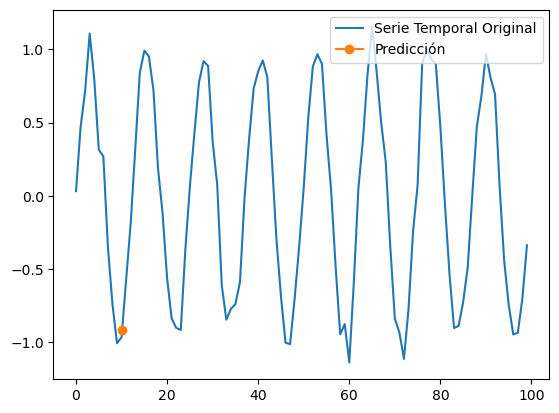

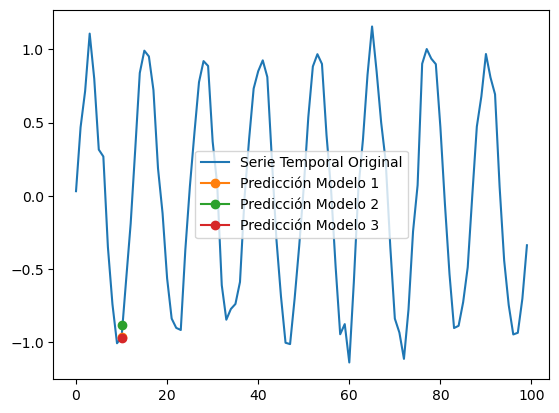

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Generación de datos de series temporales arbitrarias
def generate_time_series(n_timesteps, n_samples):
    x = np.linspace(0, 50, n_timesteps)
    series = np.sin(x) + 0.1 * np.random.randn(n_samples, n_timesteps)
    return series

n_timesteps = 100
n_samples = 1000
series = generate_time_series(n_timesteps, n_samples)

# Preparación de datos para LSTM
def create_dataset(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        seq_x = series[i:i + n_steps]
        seq_y = series[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 10
X, y = create_dataset(series[0], n_steps)

# Reshape para LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Definición del modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Entrenamiento del modelo
history = model.fit(X, y, epochs=200, verbose=0)

# Predicción
x_input = series[0][:n_steps].reshape((1, n_steps, 1))
yhat = model.predict(x_input, verbose=0)

# Visualización de resultados
plt.plot(series[0], label='Serie Temporal Original')
plt.plot(range(n_steps, n_steps+1), yhat, label='Predicción', marker='o')
plt.legend()
plt.show()

# Probar diferentes configuraciones de capas y neuronas
def create_and_train_model(n_neurons, n_layers, n_epochs):
    model = Sequential()
    for _ in range(n_layers - 1):
        model.add(LSTM(n_neurons, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
    model.add(LSTM(n_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    model.fit(X, y, epochs=n_epochs, verbose=0)
    return model

# Ejemplo con diferentes configuraciones
model1 = create_and_train_model(50, 1, 200)
model2 = create_and_train_model(100, 2, 200)
model3 = create_and_train_model(50, 3, 300)

# Predicción con modelos ajustados
yhat1 = model1.predict(x_input, verbose=0)
yhat2 = model2.predict(x_input, verbose=0)
yhat3 = model3.predict(x_input, verbose=0)

# Visualización de predicciones
plt.plot(series[0], label='Serie Temporal Original')
plt.plot(range(n_steps, n_steps+1), yhat1, label='Predicción Modelo 1', marker='o')
plt.plot(range(n_steps, n_steps+1), yhat2, label='Predicción Modelo 2', marker='o')
plt.plot(range(n_steps, n_steps+1), yhat3, label='Predicción Modelo 3', marker='o')
plt.legend()
plt.show()